In [1]:
%pylab inline
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.ticker as mticker

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib notebook

In [3]:
def readf(file):
    df = pd.read_fwf(file)
    arr = df.to_numpy()
    return arr

In [4]:
def filt(arr):
    State = arr[:,11]
    ap = where(State == 'Alive')[0][:] 
    return ap

In [5]:
def collector(arr,ap):
    Idx = arr[ap,0]
    Turn = arr[ap,1]
    x = append('x',arr[ap,2])
    px = append('px',arr[ap,3])
    y = append('y',arr[ap,4])
    py = append('py',arr[ap,5])
    z = append('z',arr[ap,6])
    pz = append('pz',arr[ap,7])
    sx = append('sx',arr[ap,8])
    sy = append('sy',arr[ap,9])
    sz = append('sz',arr[ap,10])
    return Idx, Turn, x, px, y, py, z, pz, sx, sy, sz

In [6]:
def DF(file):
    df = pd.read_fwf(file)
    pd.set_option('display.max_rows', None)
    display(df)

In [7]:
def stats(file):
    df = pd.read_fwf(file)
    display(df.describe(percentiles=[0.05,0.995]))

In [8]:
def deci2d(x,y):
    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda y,pos : "${}$".format(f._formatSciNotation('%1.10e' % y))
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))

In [9]:
def deci3d(x,y,z):
    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda y,pos : "${}$".format(f._formatSciNotation('%1.10e' % y))
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda z,pos : "${}$".format(f._formatSciNotation('%1.10e' % z))
    plt.gca().zaxis.set_major_formatter(mticker.FuncFormatter(g))

In [10]:
def d2plot(x,y,lp,up):
    ubx = percentile(x[1:], up)
    lbx = percentile(x[1:], lp)
    uby = percentile(y[1:], up)
    lby = percentile(y[1:], lp)
    
    figure(figsize=(10, 8))
    
    plot(x[1:],y[1:],'b.')
    xlabel('%s'%x[0],size =15)
    ylabel('%s'%y[0],size =15)
    xlim([lbx,ubx])
    ylim([lby, uby])
    title('%s vs %s'%(y[0],x[0]),size =20)
    deci2d(x[1:],y[1:])

    show()

In [11]:
def pt(x):
    print('<%s>= %s '%(x[0],mean(x[1:])))
    print('sig_%s= %s '%(x[0],std(x[1:])))

In [12]:
def spt(sx):
    print('<%s>= %s '%(sx[0],mean(sx[1:])))

In [13]:
def d3plot(z,x,y,Turn,lp,up):
    ubz = percentile(z[1:], up)
    lbz = percentile(z[1:], lp)
    ubx = percentile(x[1:], up)
    lbx = percentile(x[1:], lp)
    uby = percentile(y[1:], up)
    lby = percentile(y[1:], lp)
    fig = figure(figsize=(13,11))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(z[1:], x[1:], y[1:], c='blue', marker='.') 

    ax.set_xlim([lbz,ubz])
    ax.set_ylim([lbx, ubx])
    ax.set_zlim([lby, uby])
    
    deci3d(z[1:],x[1:],y[1:])
    
    ax.set_title('Spatial distribution of particles after runing %s turns in the Ring'%Turn[0],fontsize=20)
    ax.set_xlabel('Z',fontsize=15)
    ax.set_ylabel('X',fontsize=15)
    ax.set_zlabel('Y',fontsize=15)
    show()

In [14]:
def tp(file,lp,up):
    arr = readf(file)
    size = arr[-1,0]
    ap = filt(arr)
    Idx, Turn, x, px, y, py, z, pz, sx, sy, sz = collector(arr,ap)
        
    d2plot(x,y,lp,up)
    d2plot(x,px,lp,up)
    d2plot(y,py,lp,up)
    d2plot(z,pz,lp,up)
    
    print('number of alive particles: %s / %s'%(len(ap),size))
    print(' ')
    print(' ')
    pt(x)
    pt(px)
    print(' ')
    print(' ')
    pt(y)
    pt(py)
    print(' ')
    print(' ')
    pt(z)
    pt(pz)
    print(' ')
    print(' ')
    spt(sx)
    spt(sy)
    spt(sz)

    d3plot(z,x,y,Turn,lp,up)


<IPython.core.display.Javascript object>


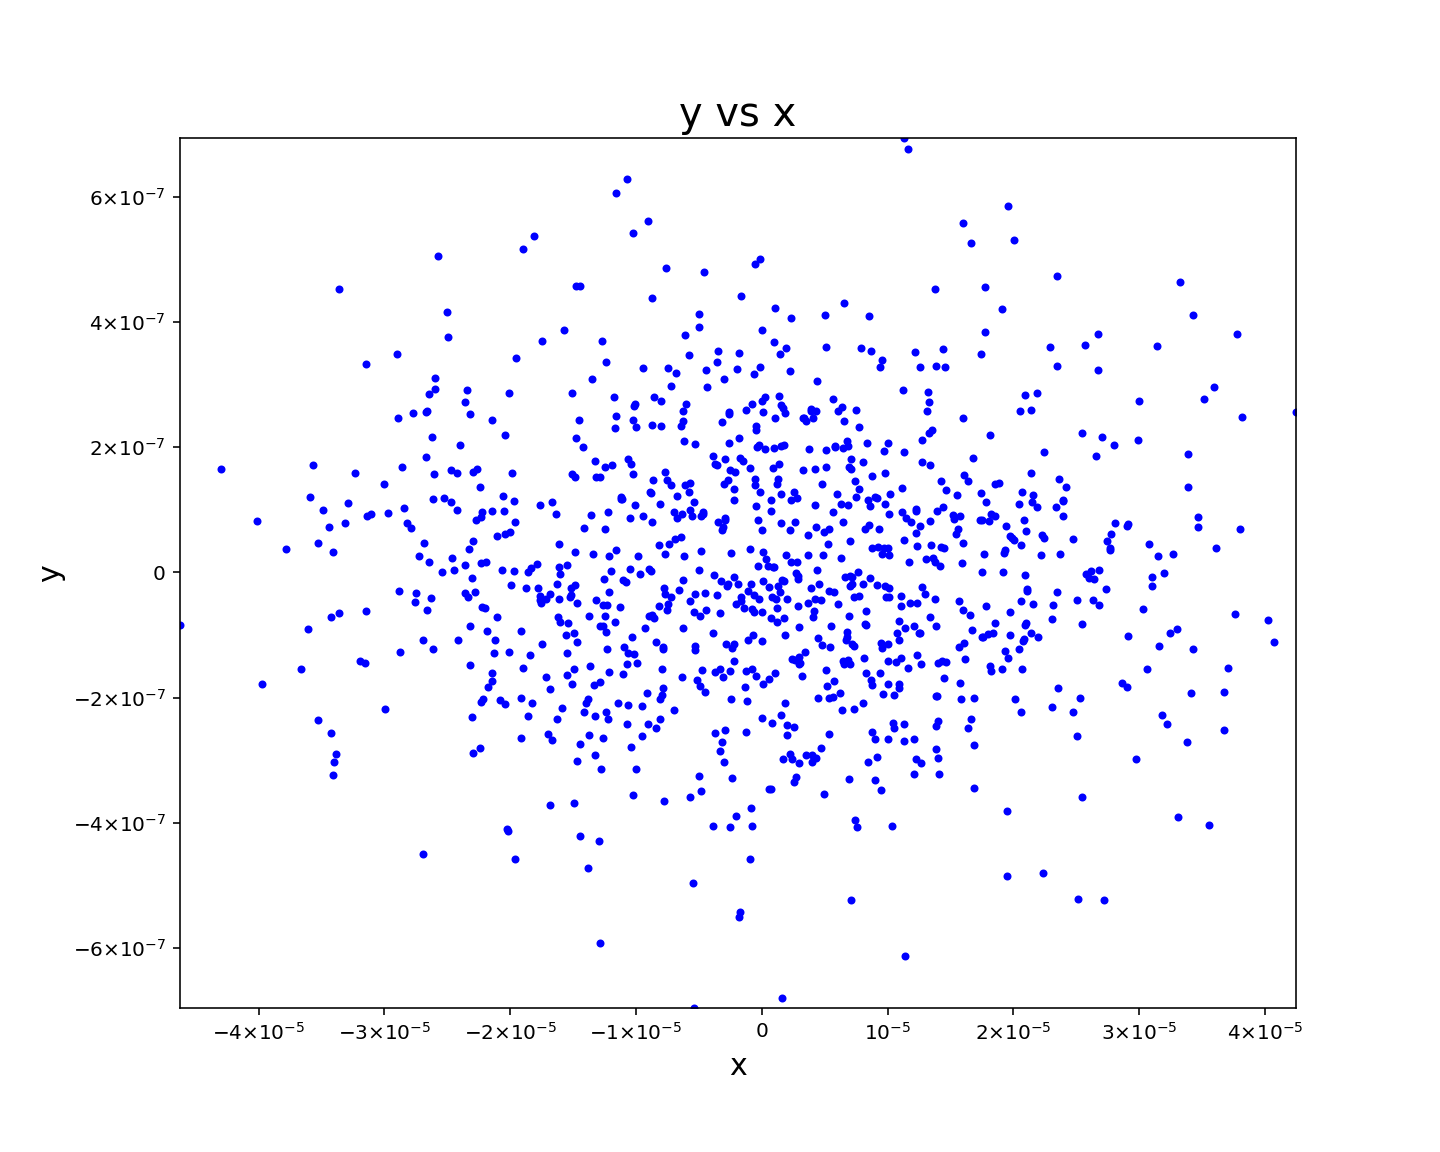

<IPython.core.display.Javascript object>


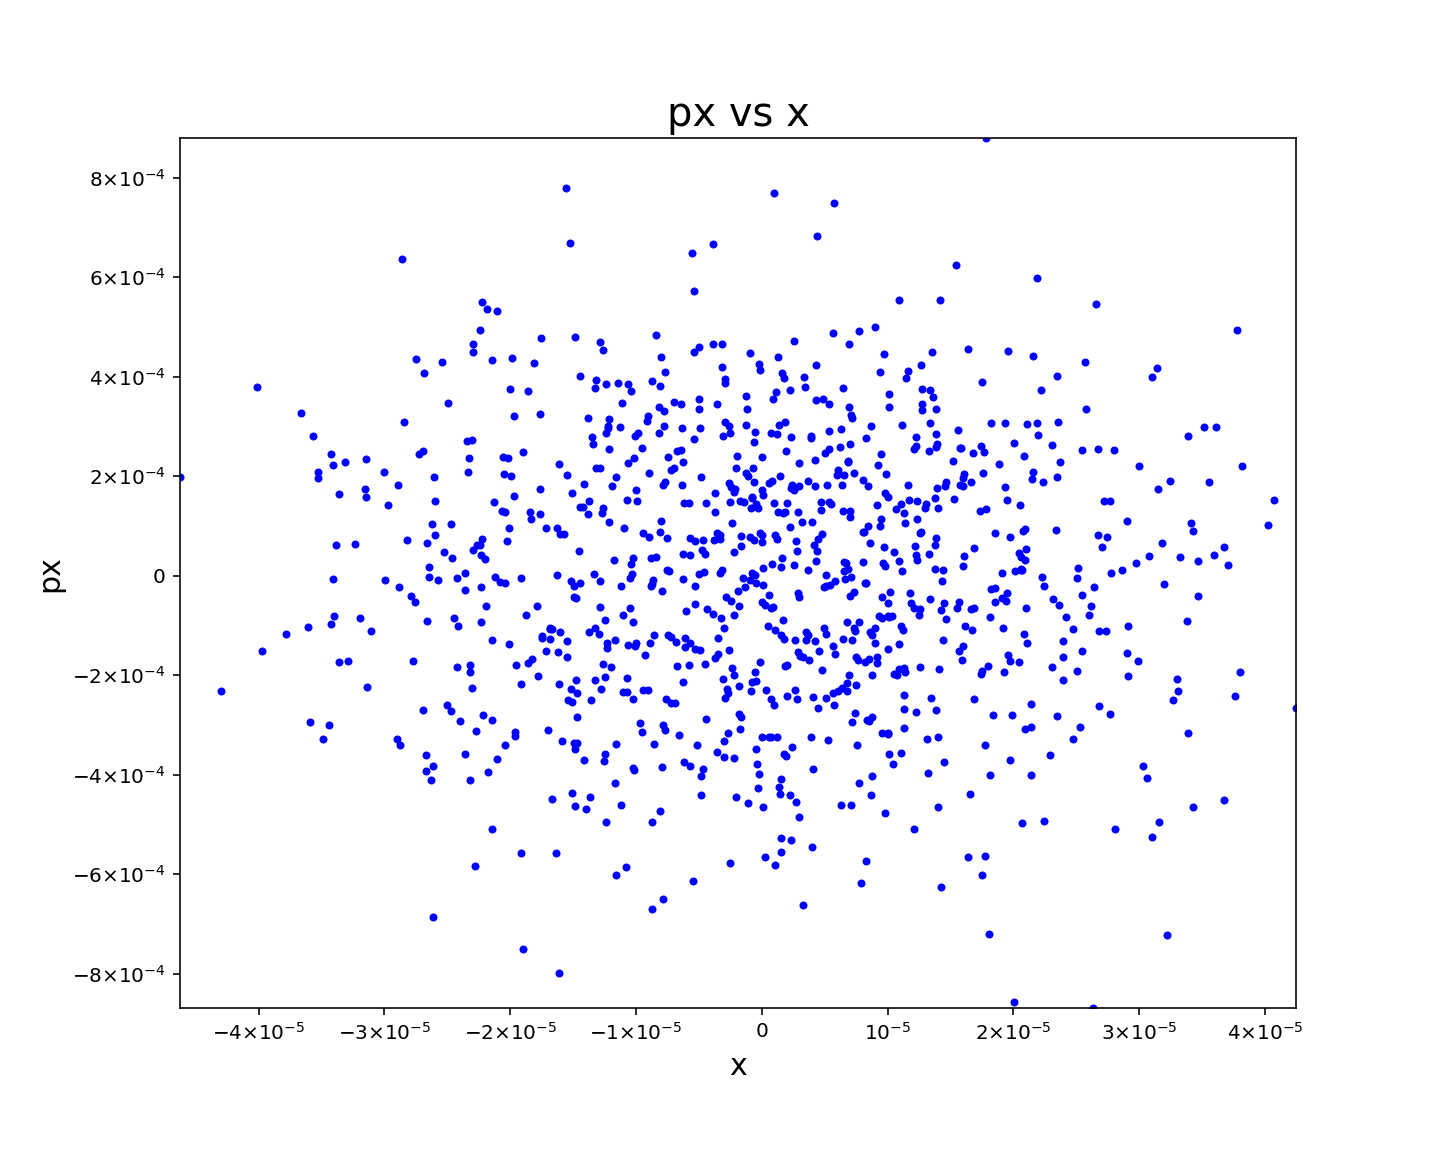

<IPython.core.display.Javascript object>


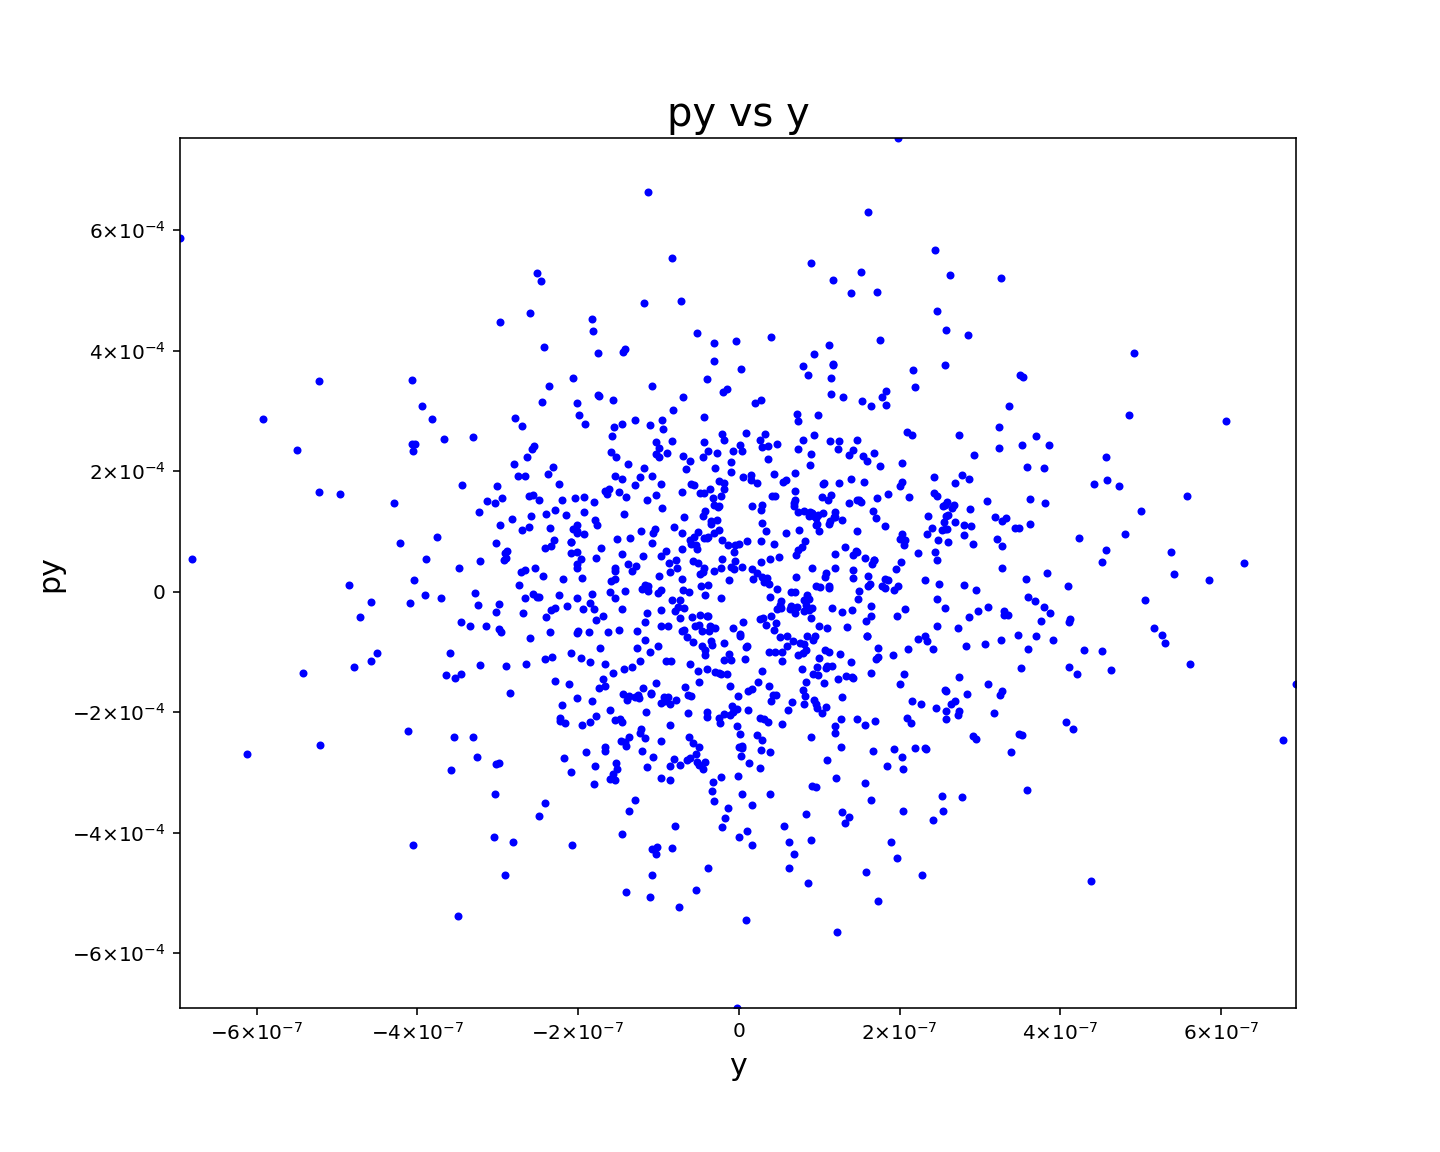

<IPython.core.display.Javascript object>


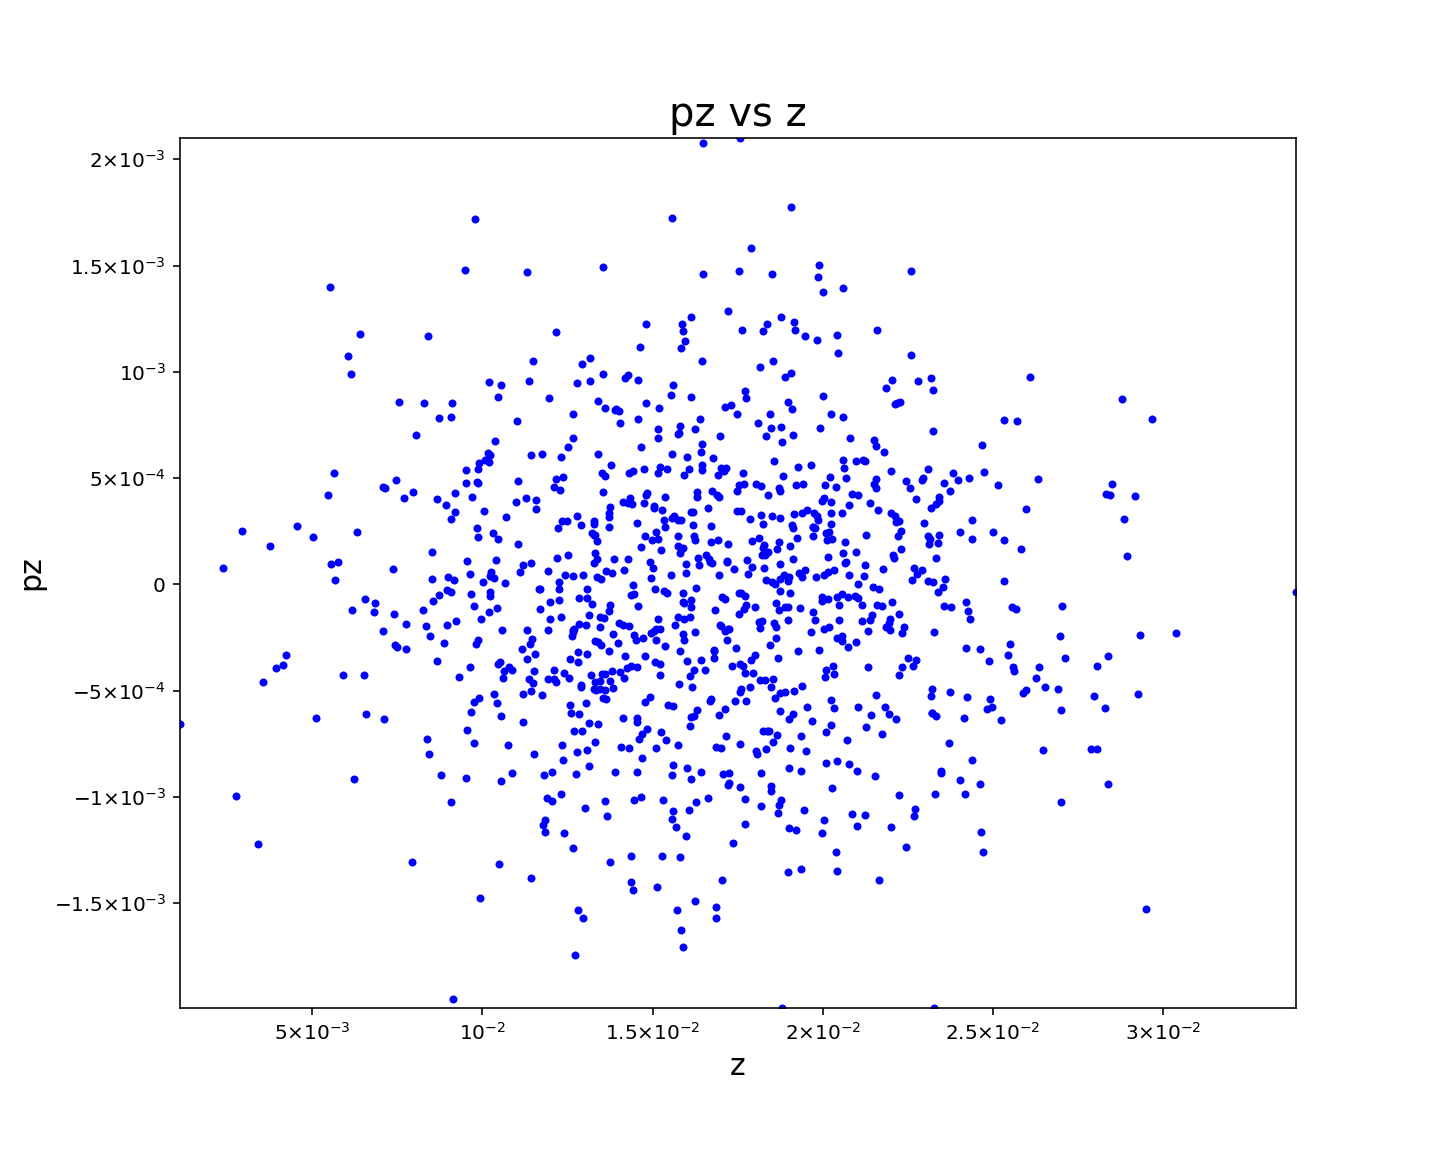

number of alive particles: 1000 / 1000
 
 
<x>= 4.948924089090992e-07 
sig_x= 1.6394657842644032e-05 
<px>= -1.8693047197999717e-07 
sig_px= 0.0002727027726703252 
 
 
<y>= 8.870450571925999e-09 
sig_y= 2.1060503996687816e-07 
<py>= 1.971680843924647e-06 
sig_py= 0.00021232595941673326 
 
 
<z>= 0.016596210072310005 
sig_z= 0.00513171483644211 
<pz>= -4.9062964135726956e-05 
sig_pz= 0.0006403229999607611 
 
 
<sx>= 0.0 
<sy>= 0.0 
<sz>= 1.0 


<IPython.core.display.Javascript object>


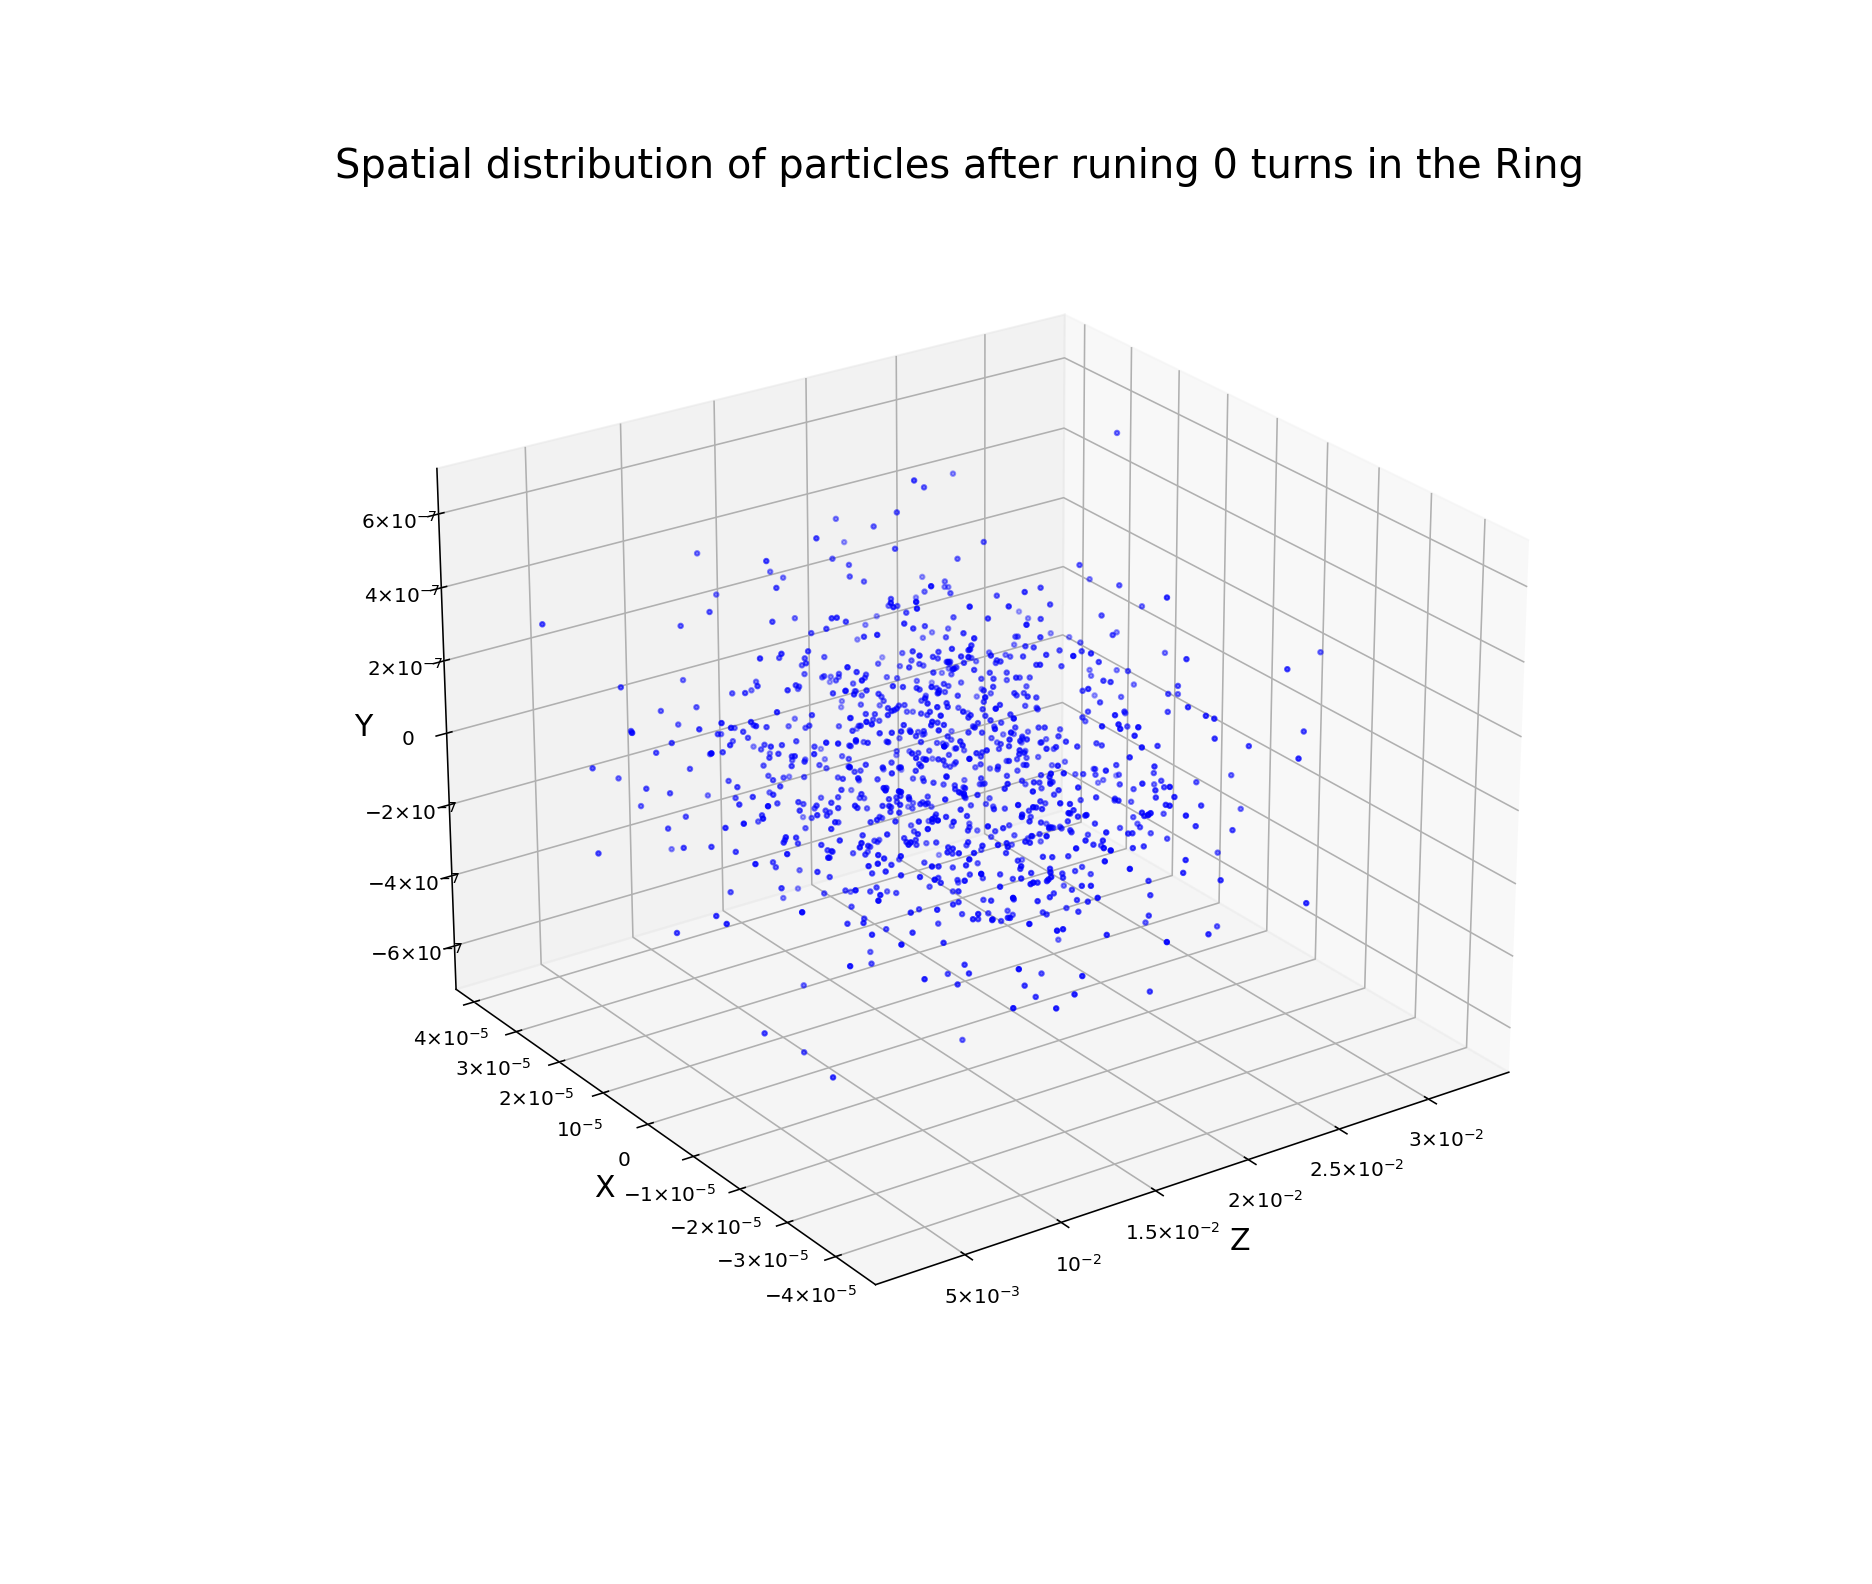

In [15]:
tp('R-Rot0.txt',0,100)

<IPython.core.display.Javascript object>


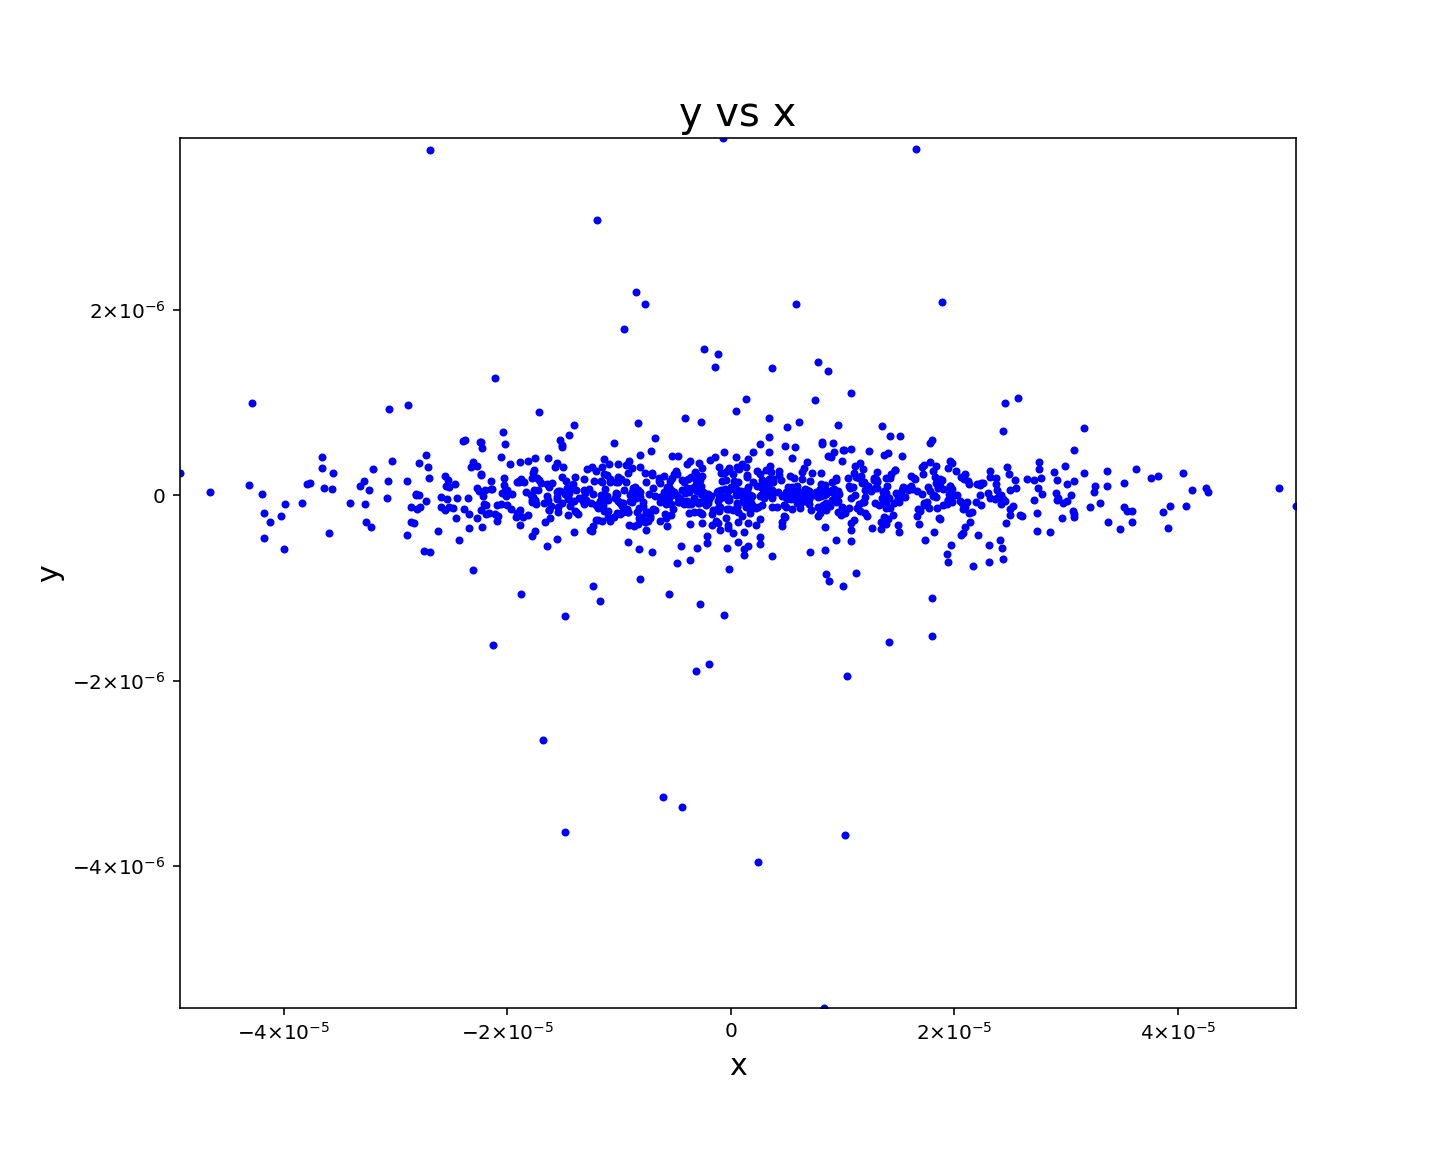

<IPython.core.display.Javascript object>


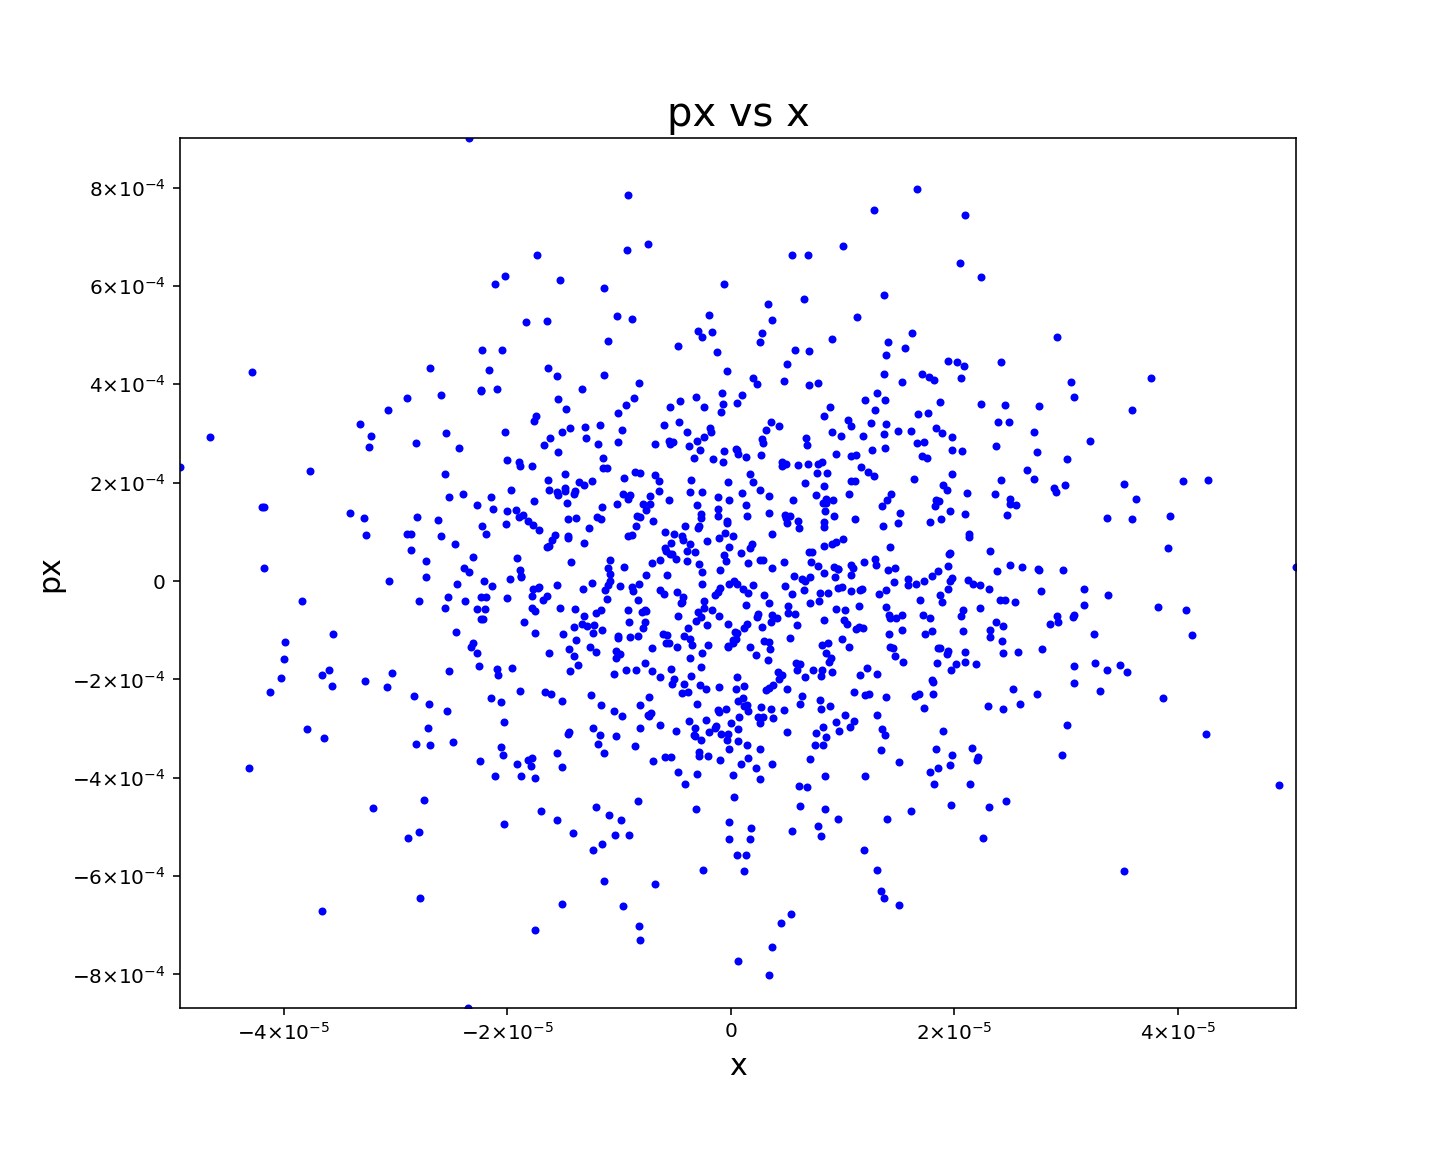

<IPython.core.display.Javascript object>


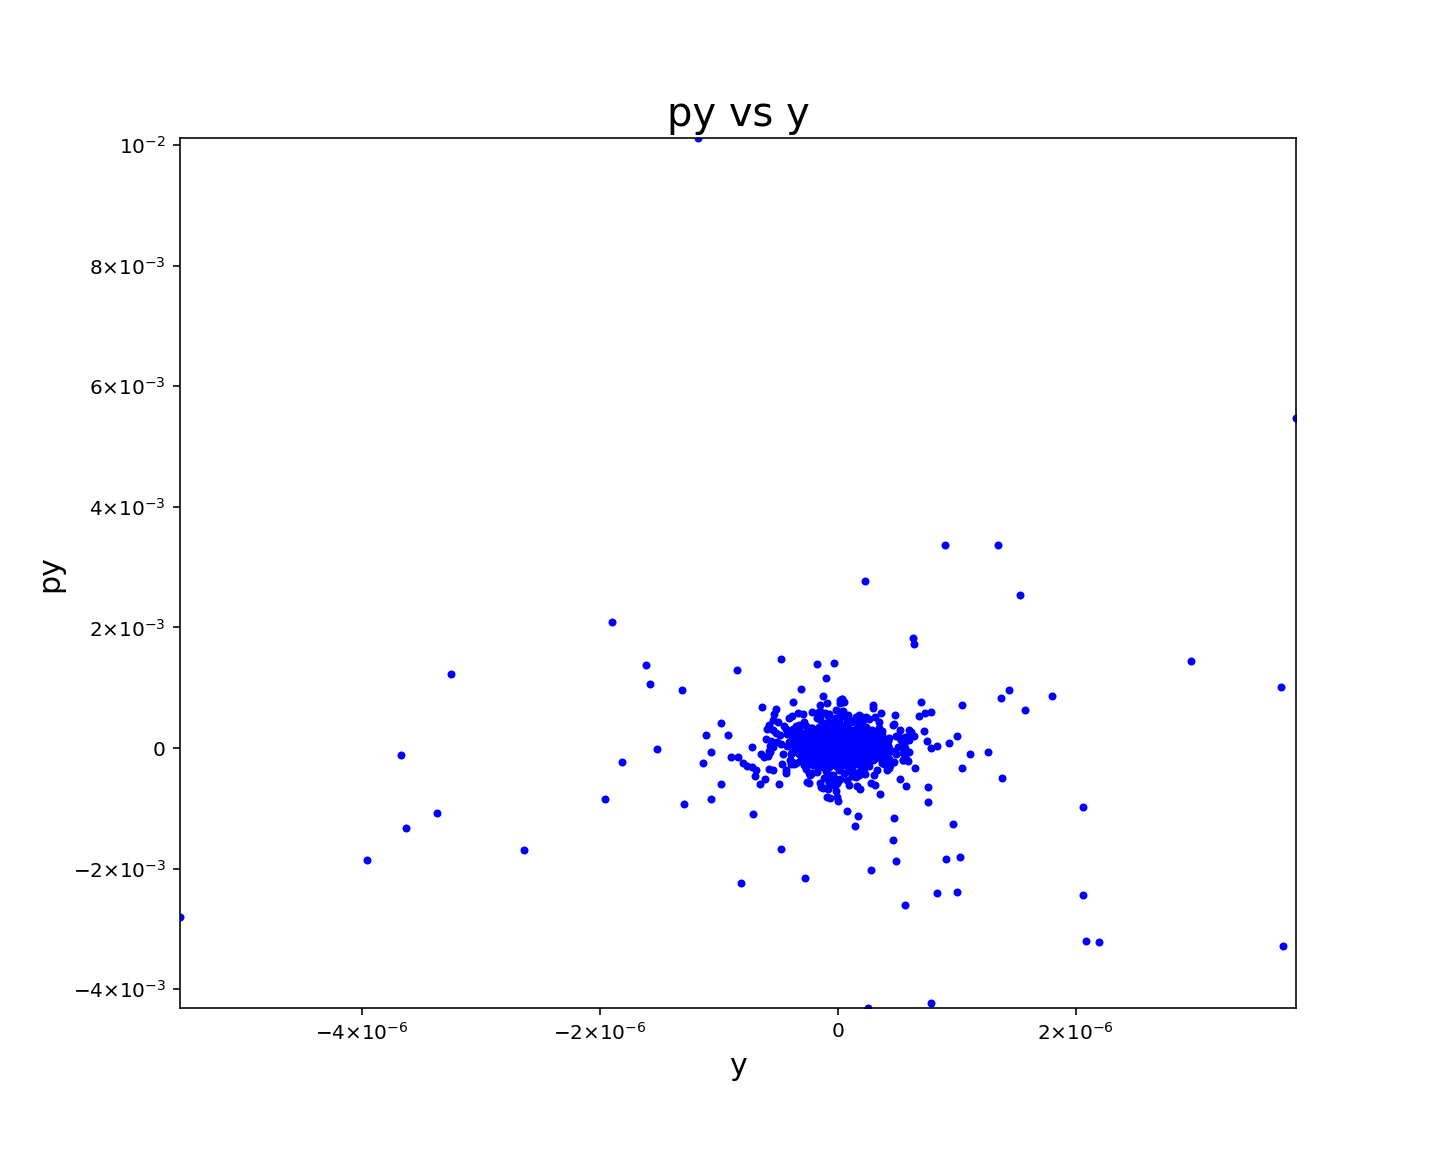

<IPython.core.display.Javascript object>


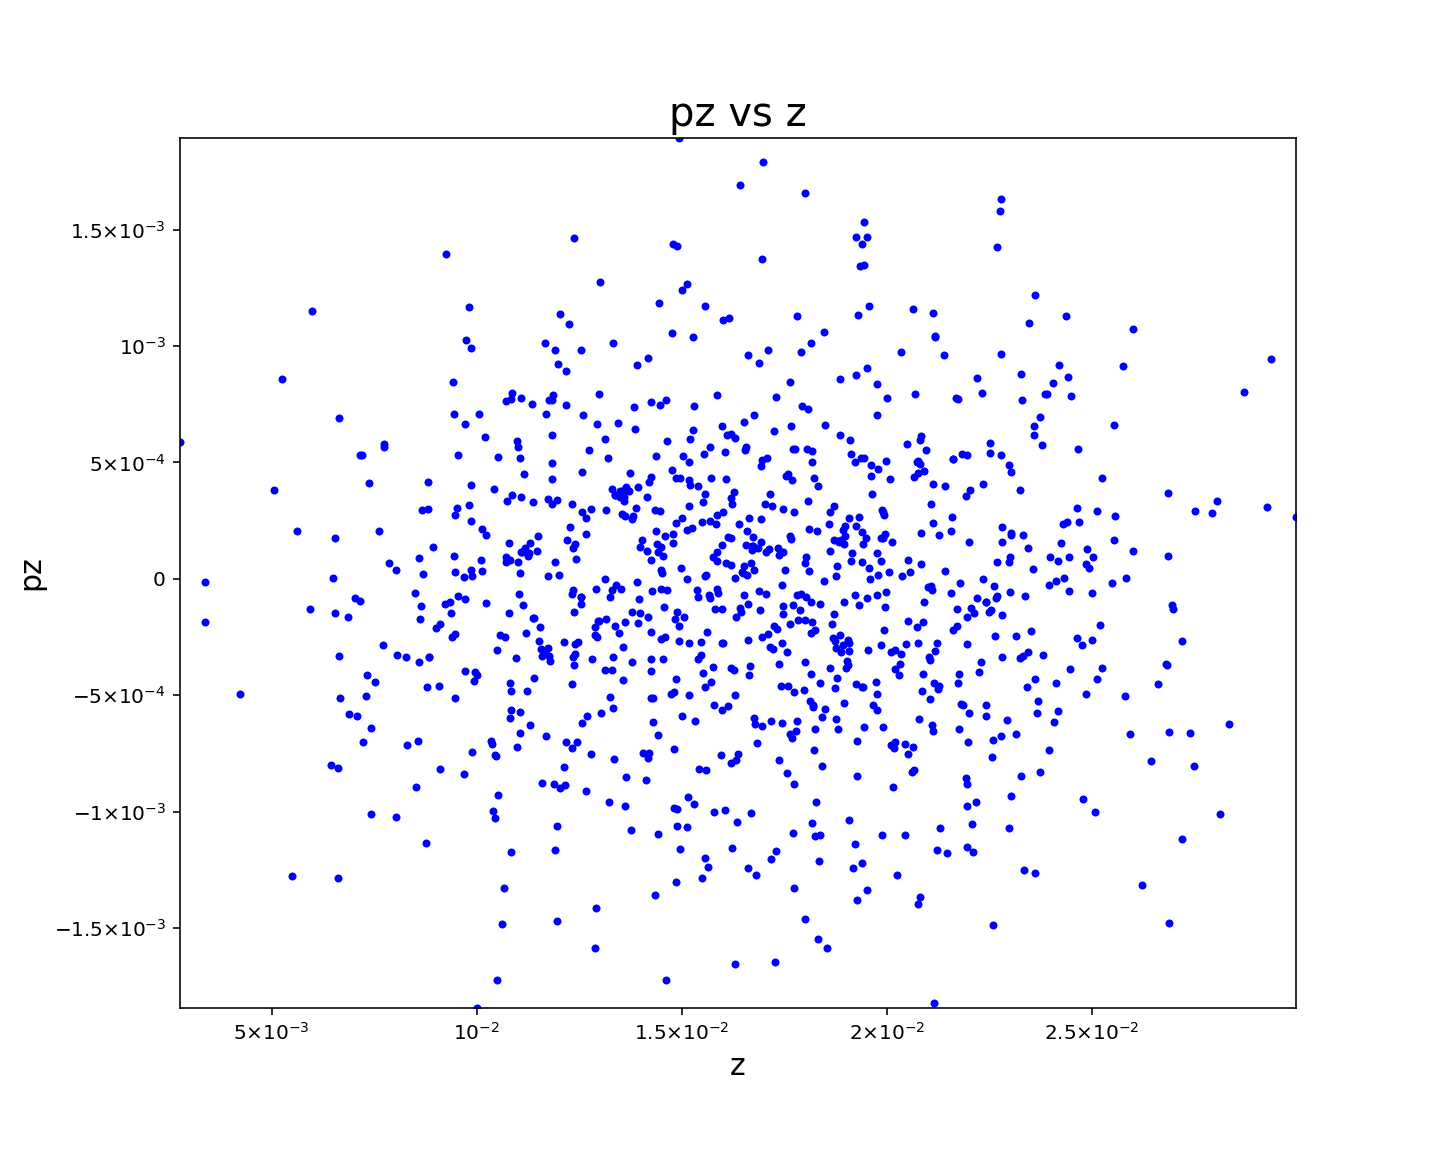

number of alive particles: 982 / 1000
 
 
<x>= 3.8218862926848283e-07 
sig_x= 1.658186589198071e-05 
<px>= -4.5047319635254605e-06 
sig_px= 0.0002777818248229651 
 
 
<y>= 6.7906226818197455e-09 
sig_y= 5.442119656193345e-07 
<py>= 1.2623346713673157e-05 
sig_py= 0.000650659699607814 
 
 
<z>= 0.016688877003085526 
sig_z= 0.004980454513341144 
<pz>= -5.3749706095269856e-05 
sig_pz= 0.0006227174942042981 
 
 
<sx>= 0.01657326782077391 
<sy>= -0.0075981374745417605 
<sz>= 0.999417282077393 


<IPython.core.display.Javascript object>


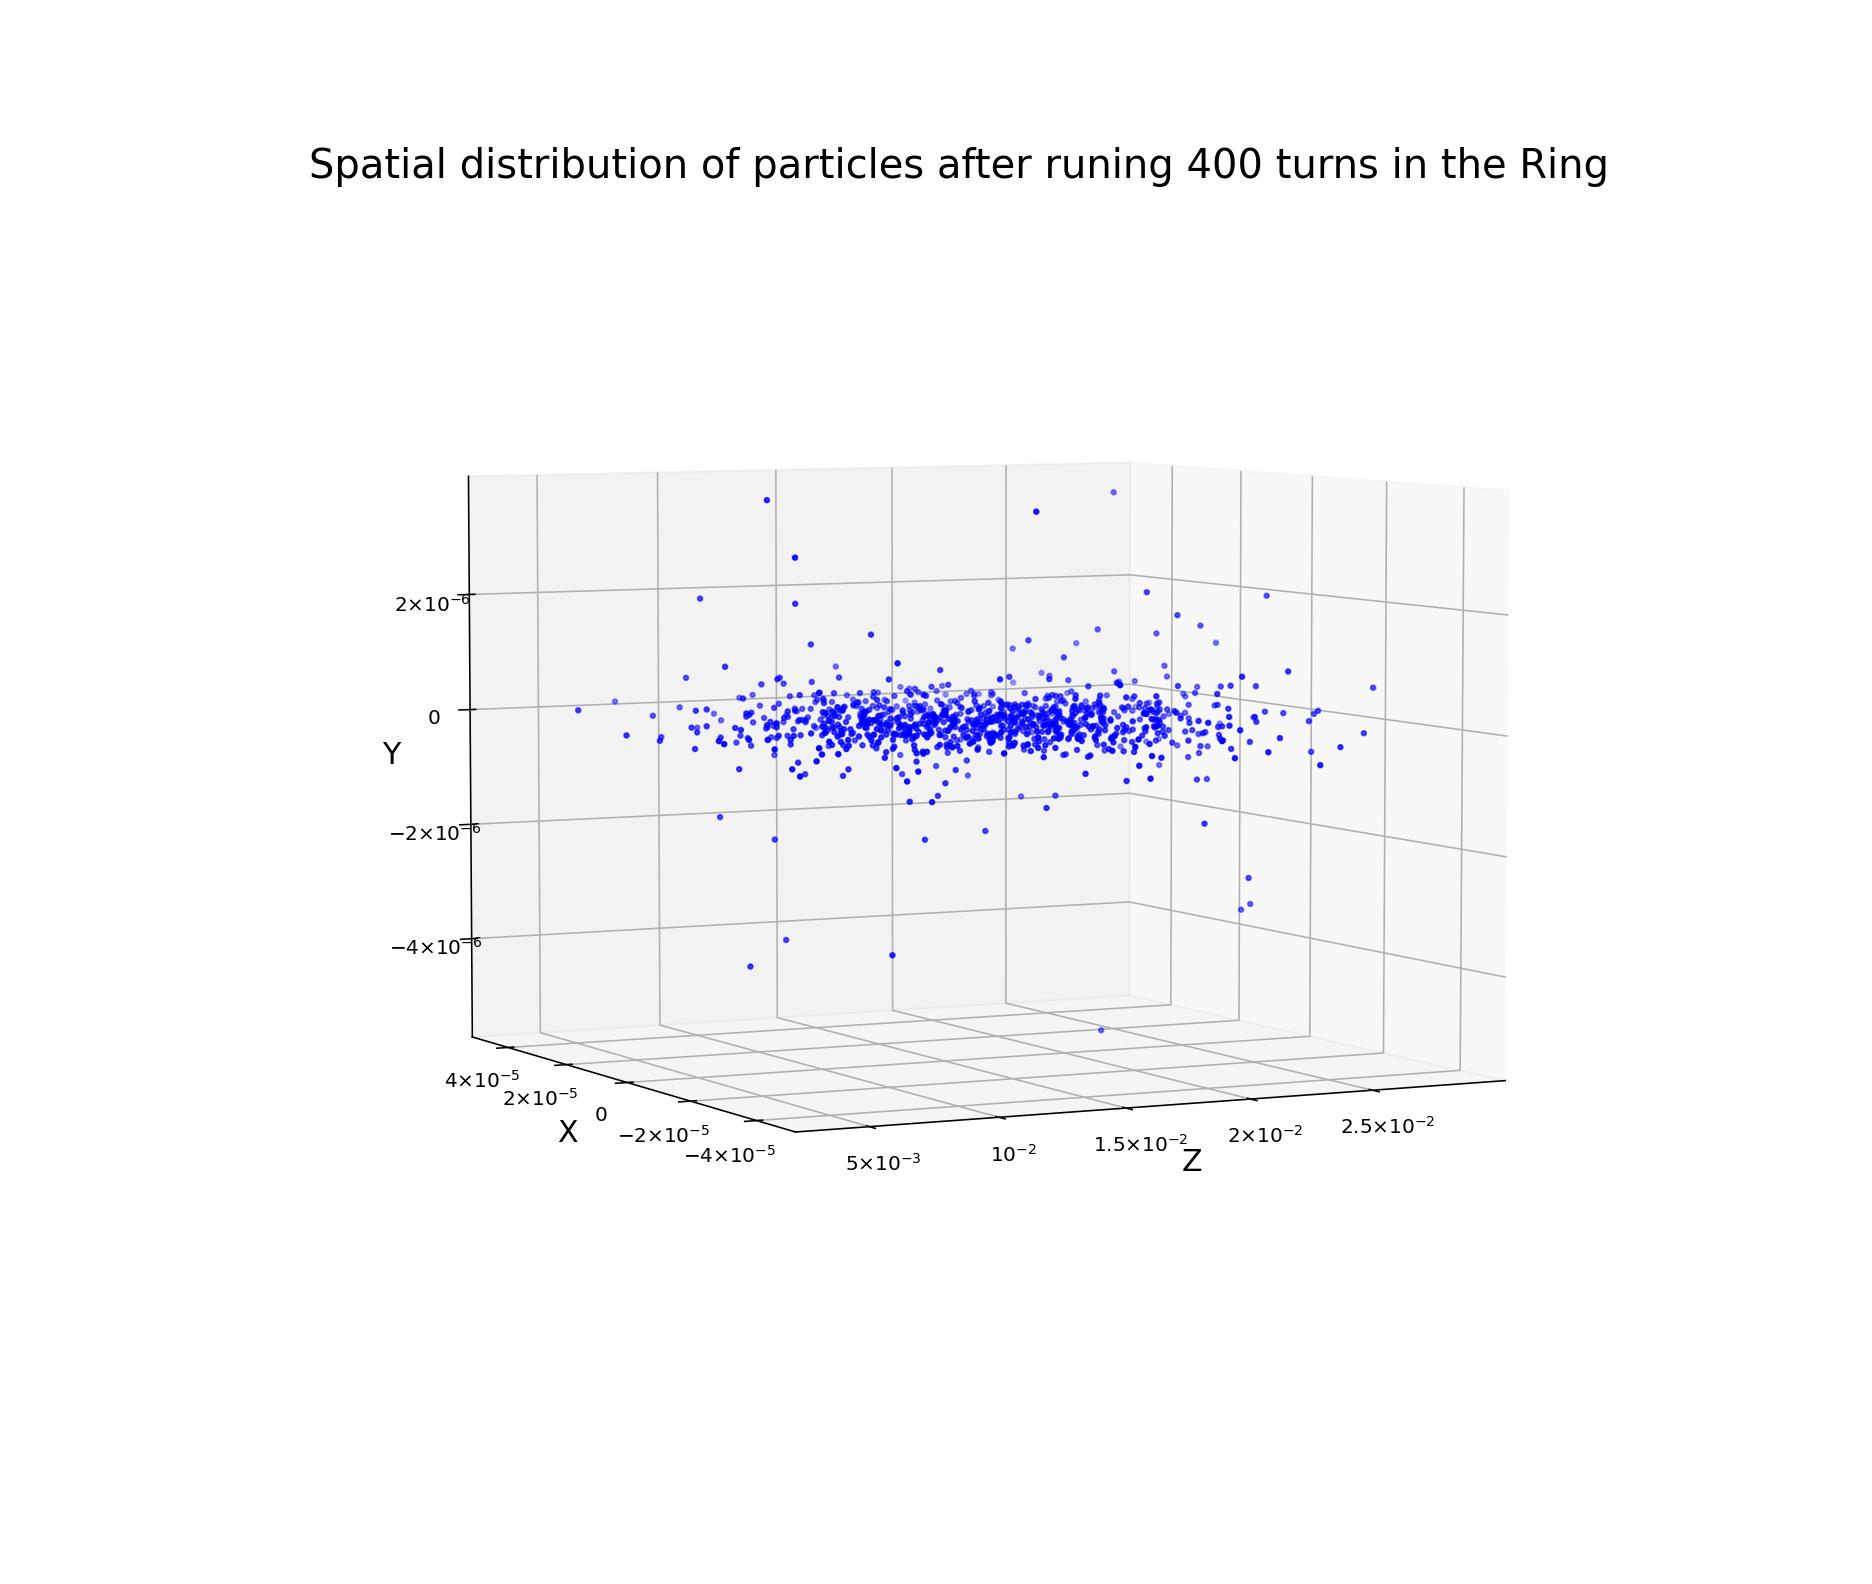

In [17]:
tp('R-Rot400.txt',0,100)